In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


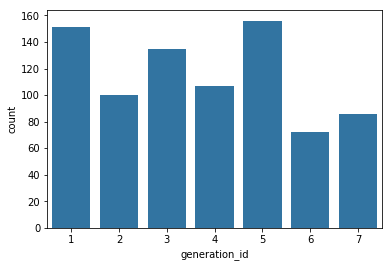

In [11]:
# plot the number of pokemen introduced in each generation

# make it a single color
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

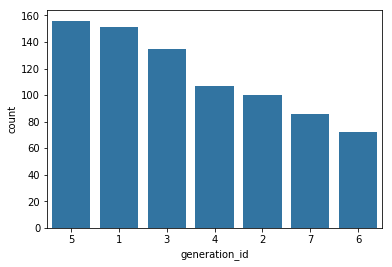

In [17]:
# sort the bar chart by count
order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = order);

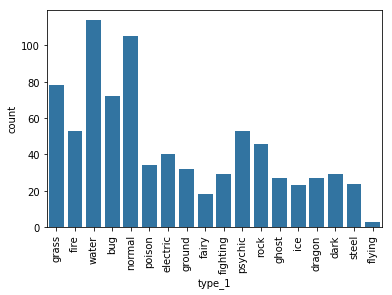

In [22]:
# plot the pokemon type (1)
sb.countplot(data = pokemon, x = 'type_1', color = base_color)

# rotate labels for readability
plt.xticks(rotation = 90);

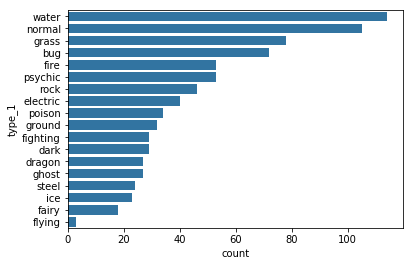

In [26]:
# order by type and use vertical alignment
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

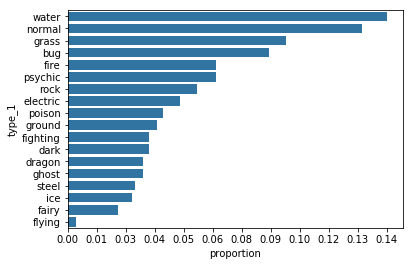

In [37]:
# convert graph to display relative proportion

# determine the range for the proportion label
n_points = pokemon.shape[0]
max_count = pokemon['type_1'].value_counts().max()
max_proportion = max_count / n_points

# get tick locations for proportions
tick_props = np.linspace(start = 0, stop = max_proportion, num = 12)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

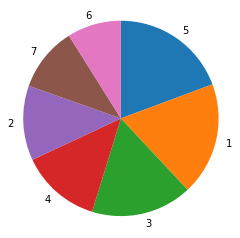

In [47]:
# plot a pie chart for the generation variable
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square');

In [49]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

(0, 6)

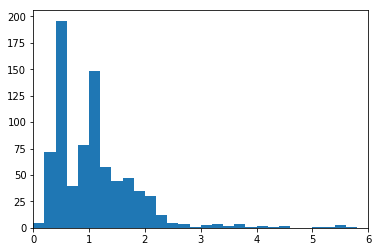

In [68]:
bins = np.arange(0, pokemon['height'].max() + .2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);

# use xlim to zoom in on the bulk of data, ignore outliers
plt.xlim((0, 6))

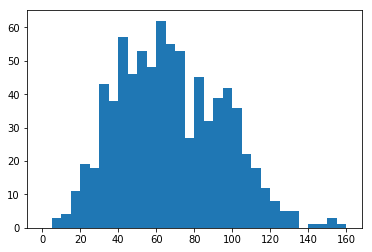

In [63]:
# generate a histogram of pokemon speed
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = pokemon['speed'], bins = bins);

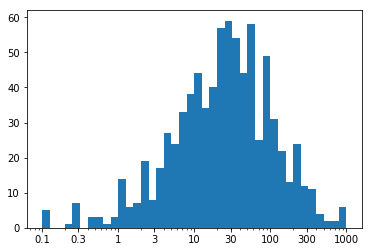

In [79]:
# generate a logarithmic plot of pokemon weight
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = pokemon['weight'], bins = bins)
plt.xscale('log')
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(tick_locs, tick_locs);